#**MVA - DM1 - Cohen Ethan**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#DATA_DIR = "classification_data_HWK1/"
COLS = ["red", "blue","green", "orange", "black", "cyan"]
MARKS = ["^","+","*","o","x","."]

In [0]:
D = {}
for l in "ABC":
    D[l] = {}
    for t in ["train", "test"]:
        D[l][t] = pd.read_csv(t + l , sep = " ")

In [0]:
#test
#D['A']['train'].as_matrix()
#D['A']['train'].as_matrix()[:, :2]
#D['A']['train'].as_matrix()[:, 2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


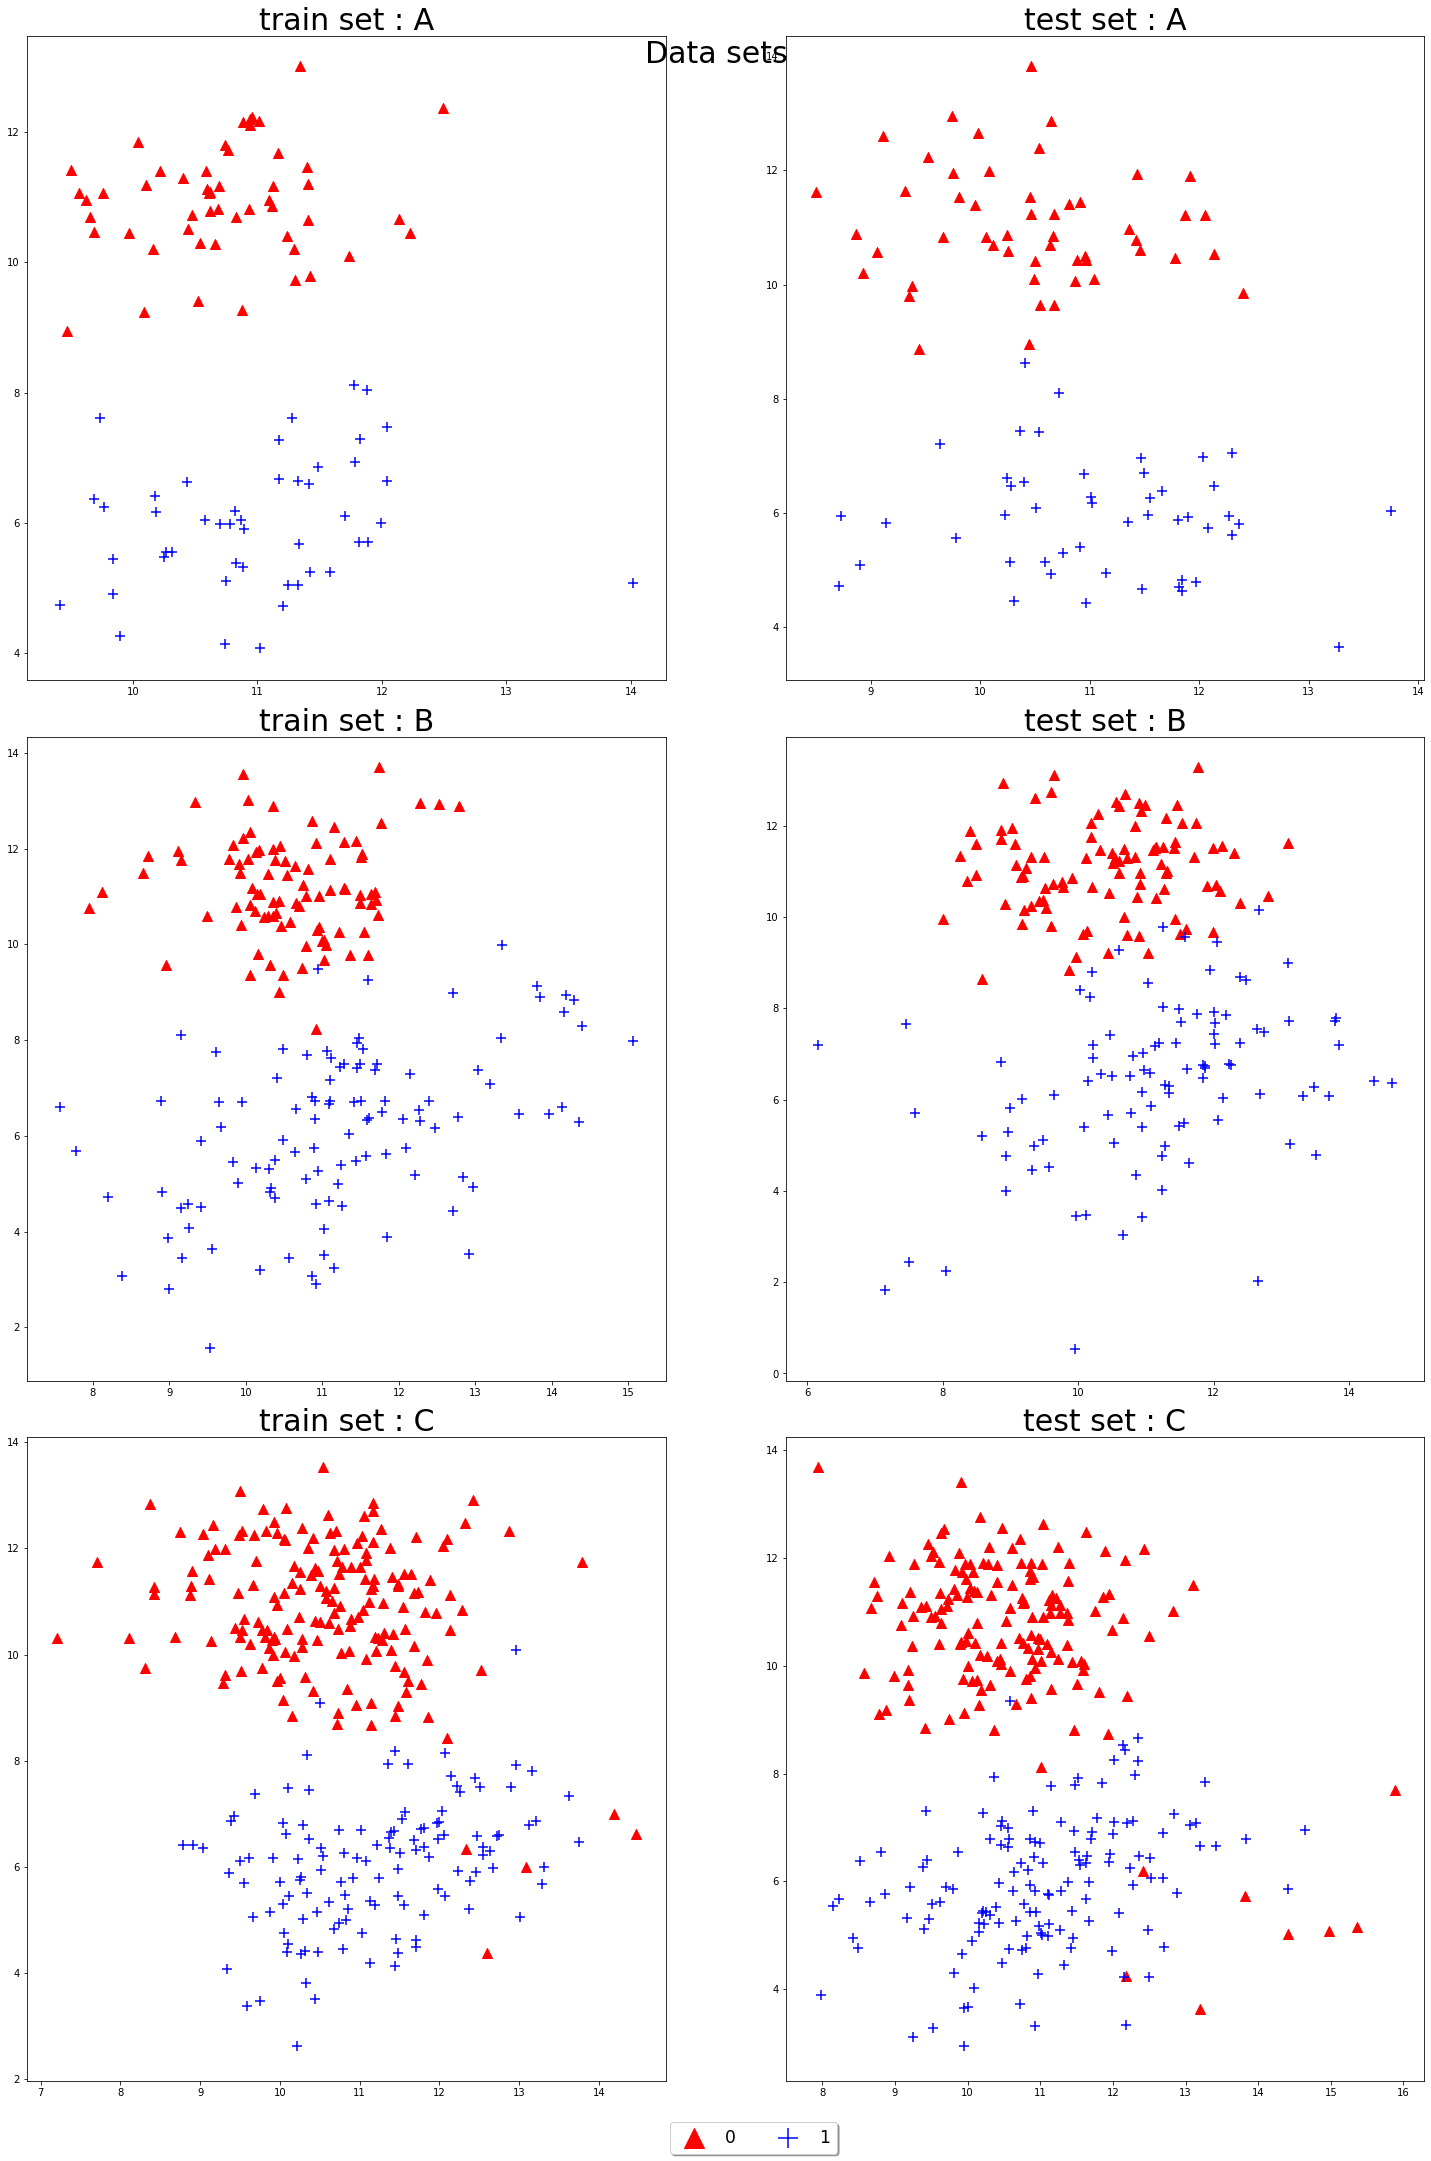

In [99]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker=MARKS[i],s = 100, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
#             ax[k][j].legend(fontsize = 30);

ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
          fancybox=True, shadow=True, ncol=2, fontsize = 'xx-large', markerscale = 2)
f.suptitle("Data sets", fontsize = 30)
f.tight_layout();

In [0]:
#Plot tools
def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def plot_data(data, labels = None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "blue","green", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1], c='r',  marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])
        
def plot_frontiere(data, f, step = 200):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x, y = make_grid(data = data, step = step)
    plt.contourf(x, y, f(grid).reshape(x.shape), colors=('gray', 'blue'), levels=[-1,0,1], alpha=0.3)

##Class


##LDA

In [0]:
def Quadratic(datax, mu, sigma):
    """
    Compute the quadratic argument of gausisan density
    """

    return -0.5 * np.dot(np.dot((datax - mu), np.linalg.inv(sigma)), (datax - mu).T)
    

class LDA(object):
    """
    LDA class for binary (0, 1) classification
    """
    def __init__(self):
        self.pi = None
        self.mu_0 = None
        self.mu_1 = None
        self.sigma = None
        return
    def fit(self, datax, datay):
        """
        Compute the MLE of for LDA
        """
        # Length of examples
        N = len(datax)
        # Number of class one
        A = datay.sum()
        # Compute pi MLE
        self.pi = A / N
        # Compute mu MLE
        self.mu_0 = (datax[datay == 0].sum(axis = 0) / (N - A)).reshape(1, -1)
        self.mu_1 = (datax[datay == 1].sum(axis = 0) / A).reshape(1, -1)
        # Compute Sigma MLE
        sigma_tilda_0 = np.dot((datax[datay == 0] - self.mu_0).T, (datax[datay == 0] - self.mu_0)) / (N - A)
        sigma_tilda_1 = np.dot((datax[datay == 1] - self.mu_1).T, (datax[datay == 1] - self.mu_1)) / A 
        self.sigma = ((N - A) * sigma_tilda_0 + A * sigma_tilda_1) / N
        return self.mu_0, self.mu_1, self.sigma, self.pi
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        p = []
        for x in datax:
            current =1 / (1 + (1 - self.pi) / self.pi * np.exp(Quadratic(x.reshape(1, -1),
                                                                self.mu_0,
                                                                self.sigma) 
                                                     - Quadratic(x.reshape(1, -1),
                                                                self.mu_1,
                                                                self.sigma)))
            current = 1 if current >= threshold else 0
            p.append(current)
        return np.array(p).reshape(-1, 1)
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

#Logistic regression

In [0]:
class Logistic_reg(object):
    """
    Logistic regression class for binary (0, 1) classification
    """
    def __init__(self):
        self.w = None
        return
    def sigmoid(self, w, x):
        """
        Compute the sigmoid value of a given x, with parameter w
        if n dimension of x
        x : N x n
        w : n x 1
        """
        return 1 / (1 + np.exp(-np.dot(x, w)))
    def update(self, w, datax, datay):
        """
        Compute one iteration of the IRLS algorithm
        """
#         print ("Determinant : {}".format(np.linalg.det(np.diagflat(self.sigmoid(w, datax) * (1 - self.sigmoid(w, datax))))))
        inv = np.linalg.pinv(np.dot(np.dot(datax.T,
                                   np.diagflat(self.sigmoid(w, datax) * (1 - self.sigmoid(w, datax)))),
                                   datax))
        temp = w + np.dot(np.dot(inv, datax.T),
                          (datay.reshape(-1 ,1) -  self.sigmoid(w, datax).reshape(-1 ,1)))
        return temp
    def resize(self, datax):
        # Length and dimension of examples
        N, D = datax.shape
        # Add one dimension of ones in datax to simulates the b of the affine function
        X = np.hstack((datax, np.array([1] * N).reshape(-1 ,1)))
        return X
    def one_pass(self, datax, datay, threshold = 10e-7, niter = 30):
        """
        IRLS Algorithm of a logistic regression with an affine function.
        Call the update method for every iteration step
        """
        X = self.resize(datax)
        # Random initialization of w
#         w = np.random.random(X.shape[1]).reshape(-1 ,1)
        w = np.zeros((X.shape[1], 1))
        self.w = w
        while (self.score(datax, datay) < 1 and niter > 0):
            w = self.update(w, X, datay)
            self.w = w
            niter -= 1
        return w
    def fit(self, datax, datay):
        """
        Compute several one_pass to find the w associated to the better log-likelihood
        """
        w = []
        ll = []
        for i in range(100):
            self.w = self.one_pass(datax, datay)
            w.append(self.w)
            ll.append(self.log_likelihood(datax, datay))
        self.w = w[np.argmax(ll)].reshape(-1 , 1)
        return self.w
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        X = self.resize(datax)
        Ypred = self.sigmoid(self.w, X)
        Ypred[Ypred >= threshold] = 1
        Ypred[Ypred < threshold] = 0
        return Ypred
    def log_likelihood(self, datax, datay):
        """
        Compute the log likelihood of the datax in the current model
        """
        X = self.resize(datax)
        return np.sum(datay * np.dot(X, self.w) + np.log(self.sigmoid(-self.w, X)))
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

#Linear Regression

In [0]:
class Linear_reg(object):
    """
    Linear Regression class for binary (0, 1) classification
    """
    def __init__(self):
        self.w = None
        self.sigma_square = None
        return
    def resize(self, datax):
        # Length and dimension of examples
        N, D = datax.shape
        # Add one dimension of ones in datax to simulates the b of the affine function
        X = np.hstack((datax, np.array([1] * N).reshape(-1 ,1)))
        return X
    def fit(self, datax, datay):
        """
        Compute the MLE w by solving normal equations and MLE sigma
        """
        # Start by resizing datax
        X = self.resize(datax)
        # Solve norml equations to find w_MLE
        self.w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(datay.reshape(-1,1))
        # Then compute sigma  MLE square
        self.sigma_square = 1 / X.shape[0] * ((datay.reshape(-1 ,1) - X.dot(self.w))**2).sum()
        return self.w, self.sigma_square   
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        X = self.resize(datax)
        Ypred = 1 / (np.sqrt(2 * np.pi * self.sigma_square)) * \
         np.exp(-0.5 * (1 - X.dot(self.w))**2 / self.sigma_square)
        Ypred[Ypred >= threshold] = 1
        Ypred[Ypred < threshold] = 0
        return Ypred
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

#QDA

In [0]:
class QDA(object):
    """
    QDA class for binary (0, 1) classification
    """
    def __init__(self):
        self.pi = None
        self.mu_0 = None
        self.mu_1 = None
        self.sigma_0 = None
        self.sigma_1 = None
        return
    def fit(self, datax, datay):
        """
        Compute the MLE of for LDA
        """
        # Length of examples
        N = len(datax)
        # Number of class one
        A = datay.sum()
        # Compute pi MLE
        self.pi = A / N
        # Compute mu MLE
        self.mu_0 = (datax[datay == 0].sum(axis = 0) / (N - A)).reshape(1, -1)
        self.mu_1 = (datax[datay == 1].sum(axis = 0) / A).reshape(1, -1)
        # Compute Sigma MLE
        self.sigma_0 = np.dot((datax[datay == 0] - self.mu_0).T, (datax[datay == 0] - self.mu_0)) / (N - A)
        self.sigma_1 = np.dot((datax[datay == 1] - self.mu_1).T, (datax[datay == 1] - self.mu_1)) / A
        return self.mu_0, self.mu_1, self.sigma_0, self.sigma_1, self.pi
    def predict(self, datax,  threshold = 0.5):
        """
        Compute p(y = 1 | x) and compare it with a treshold to classify the point.
        If p(y = 1 | x) > threshold, returns 1, else return 0
        """
        p = []
        for x in datax:
            current =1 / (1 + (1 - self.pi) / self.pi * np.exp(Quadratic(x.reshape(1, -1),
                                                                self.mu_0,
                                                                self.sigma_0) 
                                                     - Quadratic(x.reshape(1, -1),
                                                                self.mu_1,
                                                                self.sigma_1)))
            current = 1 if current >= threshold else 0
            p.append(current)
        return np.array(p).reshape(-1, 1)
    def score(self, datax, datay,):
        """
        Given data and their label, return the correct percentage of classification
        """
        return (self.predict(datax) == datay.reshape(-1 ,1)).sum() / len(datay)

#Figures

#LDA


----------------- A --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Error in train : 0.0
Error in test : 0.010101010101010055
pi : 0.47474747474747475
mu_0 : [[10.73248858 10.93983367]]
mu_1 : [[11.00911982  5.98309461]]
sigma : [[0.58154891 0.13525529]
 [0.13525529 0.82566886]]
----------------- B --------------------
Error in train : 0.02010050251256279
Error in test : 0.045226130653266305
pi : 0.5477386934673367
mu_0 : [[10.58256756 11.17169818]]
mu_1 : [[11.2357268   6.08554784]]
sigma : [[1.64371135 0.6979725 ]
 [0.6979725  2.06522898]]
----------------- C --------------------
Error in train : 0.026755852842809347
Error in test : 0.04013377926421402
pi : 0.4180602006688963
mu_0 : [[10.61324808 10.83448839]]
mu_1 : [[11.18463199  6.04249315]]
sigma : [[ 1.27886433 -0.06520325]
 [-0.06520325  1.66961839]]


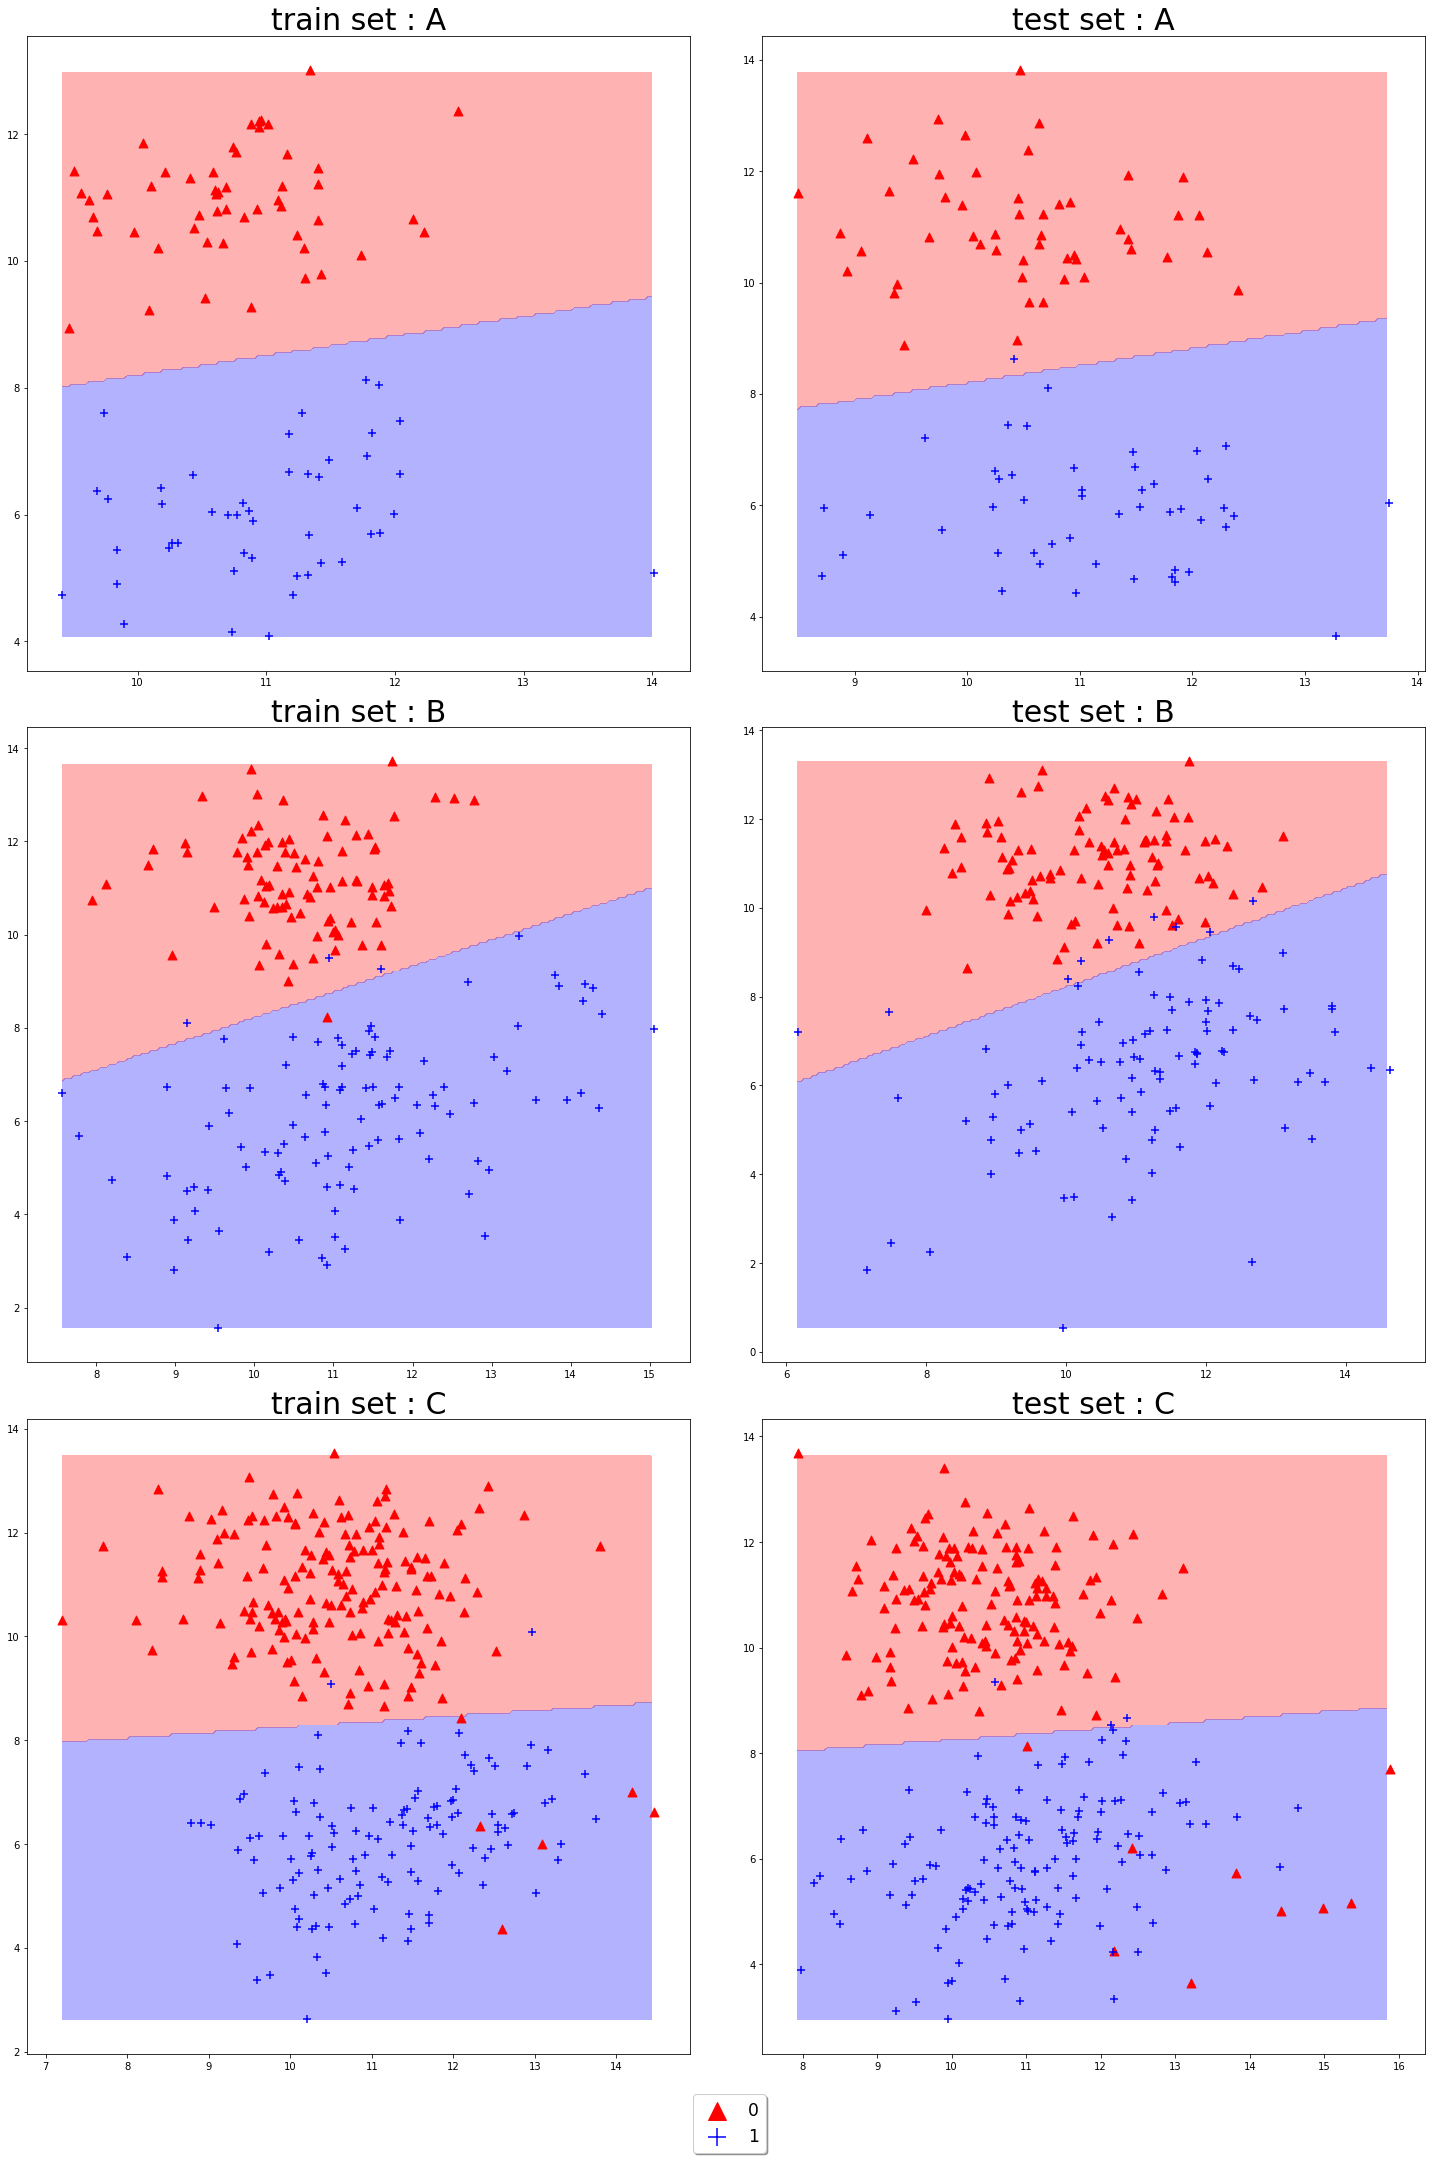

In [105]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    print ("----------------- {} --------------------".format(l))
    classifier = LDA()
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        # Fit the classifier
        if t == "train":
            classifier.fit(x, y)
        grid, x_grid, y_grid = make_grid(data = x, step = 200)
        ax[k][j].contourf(x_grid, y_grid, classifier.predict(grid).reshape(x_grid.shape),
                          colors = ('red', 'blue'), levels = [-1,0,1], alpha = 0.3)
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker = MARKS[i], s = 80, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
        print ("Error in {} : {}".format(t, 1 - classifier.score(x, y)))
    print ("pi : {}".format(classifier.pi))
    print ("mu_0 : {}".format(classifier.mu_0))
    print ("mu_1 : {}".format(classifier.mu_1))
    print ("sigma : {}".format(classifier.sigma))
        
ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                markerscale = 2)
                
f.tight_layout();

#Logistic regression

----------------- A --------------------
Error in train : 0.0
Error in test : 0.010101010101010055
Classifieur for A training set
[[ 0.21691836]
 [-0.70469539]
 [ 3.59338985]]
Log-likelihood -10888.240409444457
----------------- B --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Error in train : 0.01005025125628145
Error in test : 0.035175879396984966
Classifieur for B training set
[[ 1.84229334]
 [-3.71377733]
 [13.42977807]]
Log-likelihood -189413.52876367606
----------------- C --------------------
Error in train : 0.030100334448160515
Error in test : 0.04682274247491636
Classifieur for C training set
[[-0.27672532]
 [-1.9138407 ]
 [18.80186372]]
Log-likelihood -213394.99452111806


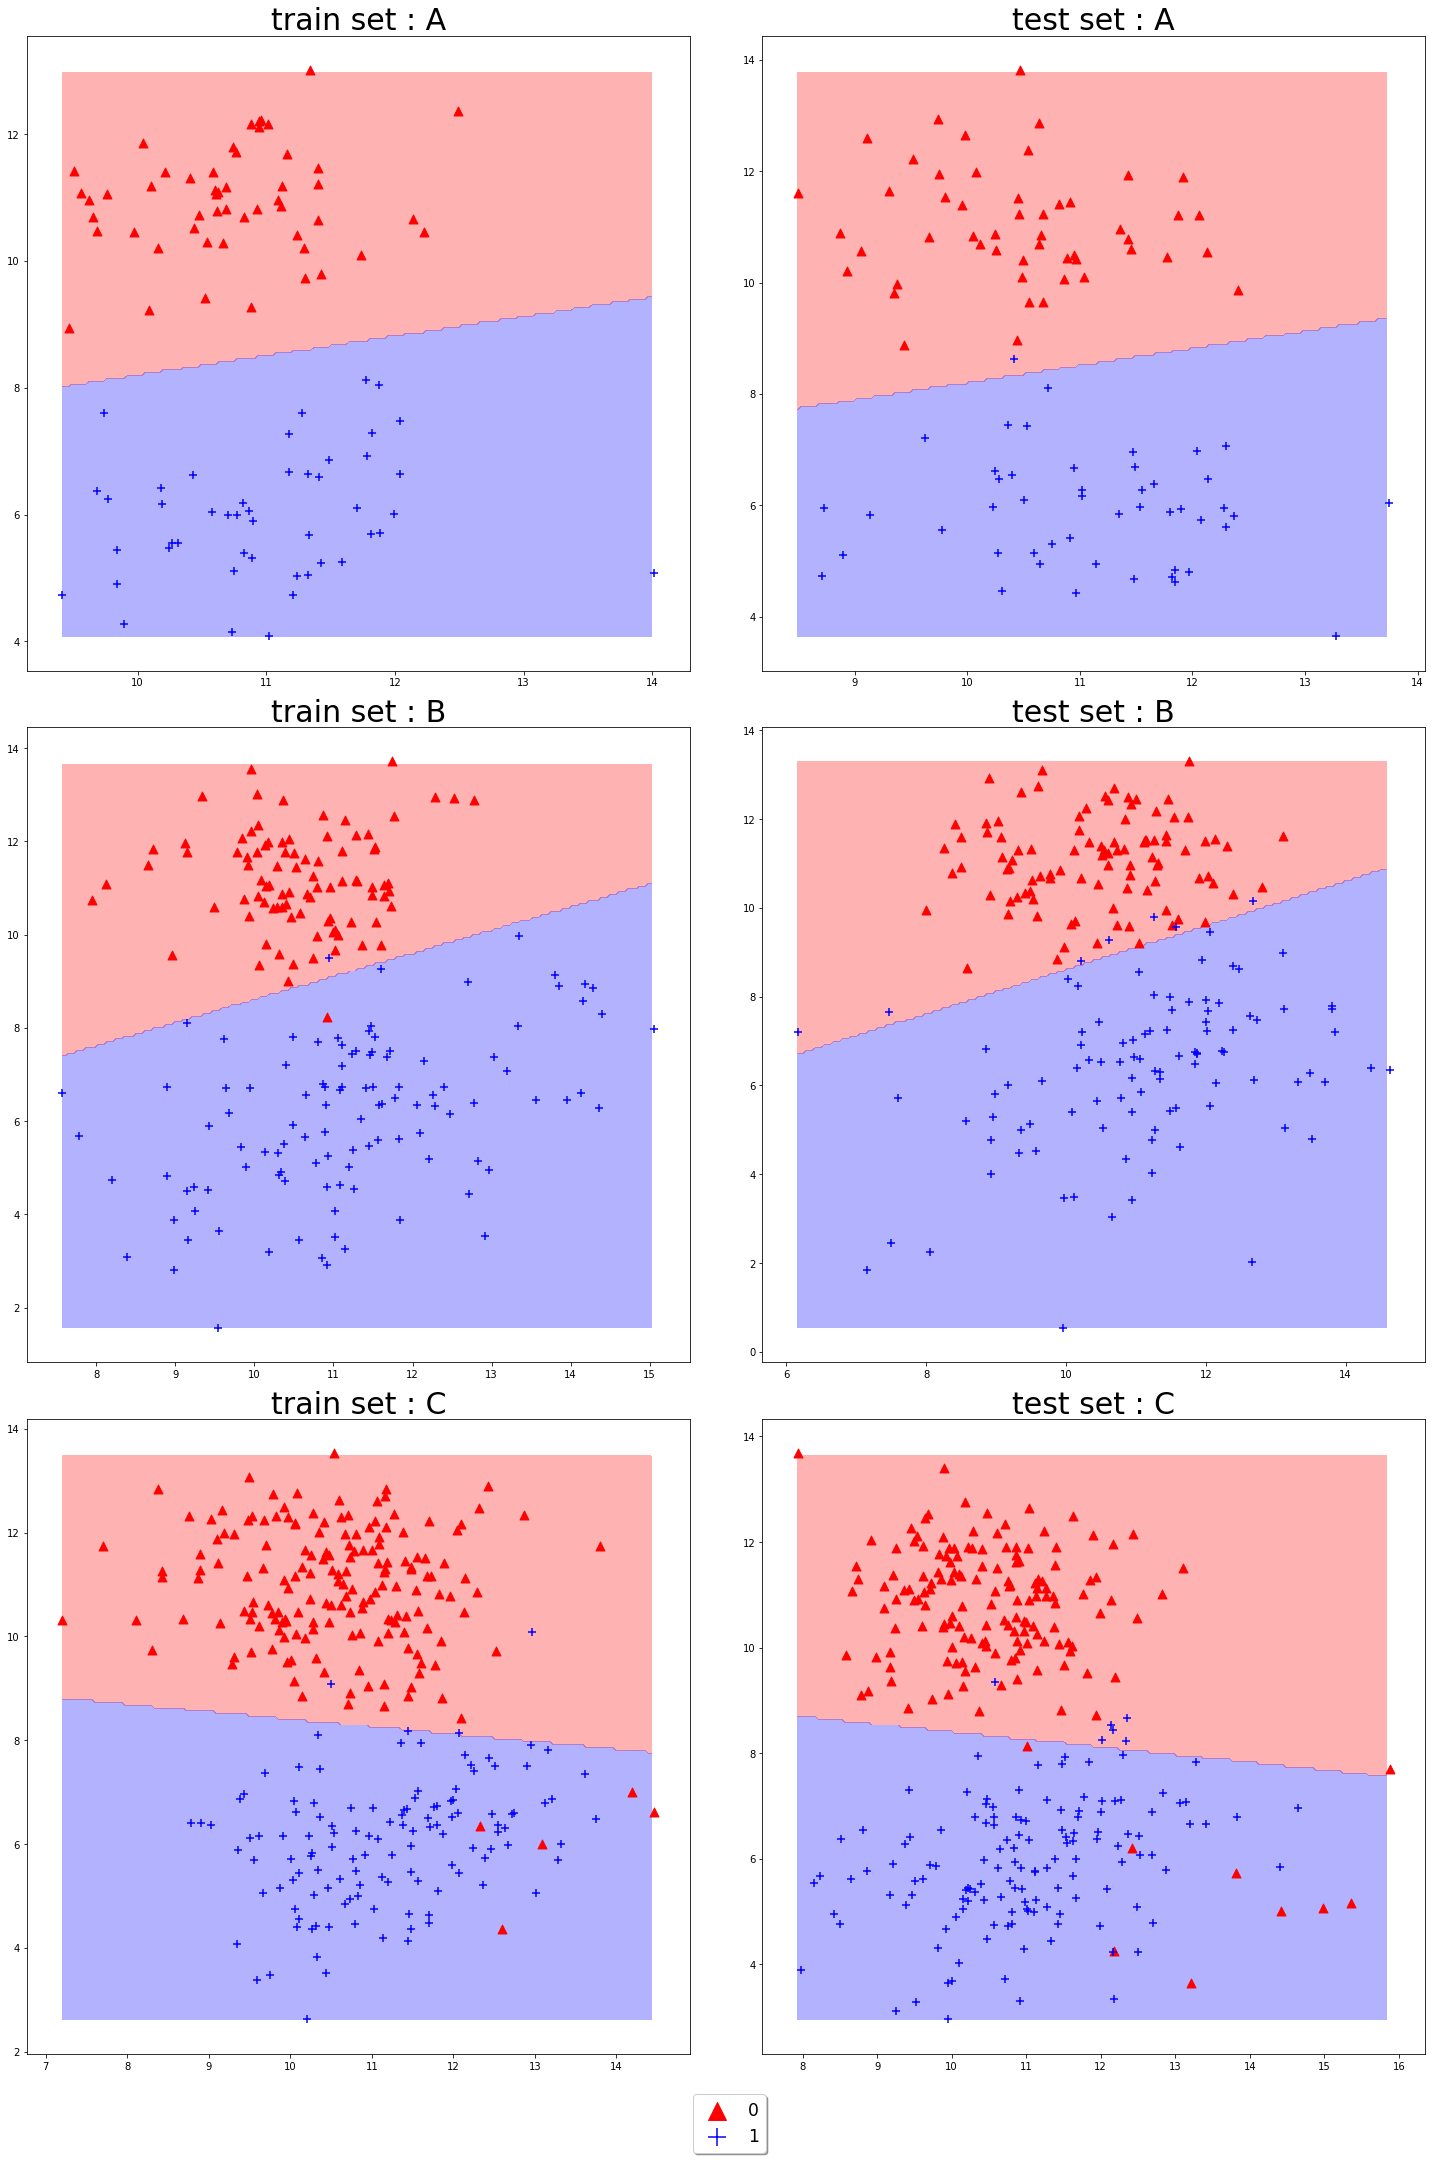

In [106]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    print ("----------------- {} --------------------".format(l))
    classifier = Logistic_reg()
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        # Fit the classifier
        if t == "train":
            classifier.fit(x, y)
        grid, x_grid, y_grid = make_grid(data = x, step = 200)
        ax[k][j].contourf(x_grid, y_grid, classifier.predict(grid).reshape(x_grid.shape),
                          colors = ('red', 'blue'), levels = [-1,0,1], alpha = 0.3)
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker = MARKS[i], s = 80, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
        print ("Error in {} : {}".format(t, 1 - classifier.score(x, y)))
    print ("Classifieur for {} training set".format(l))
    print (classifier.w)
#     print (classifier.score(x, y))
    print ("Log-likelihood {}".format(classifier.log_likelihood(x, y)))
            
ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                markerscale = 2)
                
f.tight_layout();

#Linear regression

----------------- A --------------------
Error in train : 0.04040404040404044
Error in test : 0.06060606060606055
w : [[ 0.05422959]
 [-0.17617385]
 [ 1.39834746]]
sigma_squared : 0.027866389580095446
----------------- B --------------------
Error in train : 0.07035175879396982
Error in test : 0.09547738693467334
w : [[ 0.08195399]
 [-0.14748374]
 [ 0.88790675]]
sigma_squared : 0.04863915668173298
----------------- C --------------------
Error in train : 0.06688963210702337
Error in test : 0.07023411371237454
w : [[ 0.01674427]
 [-0.15897741]
 [ 1.64030207]]
sigma_squared : 0.05561845843727832


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


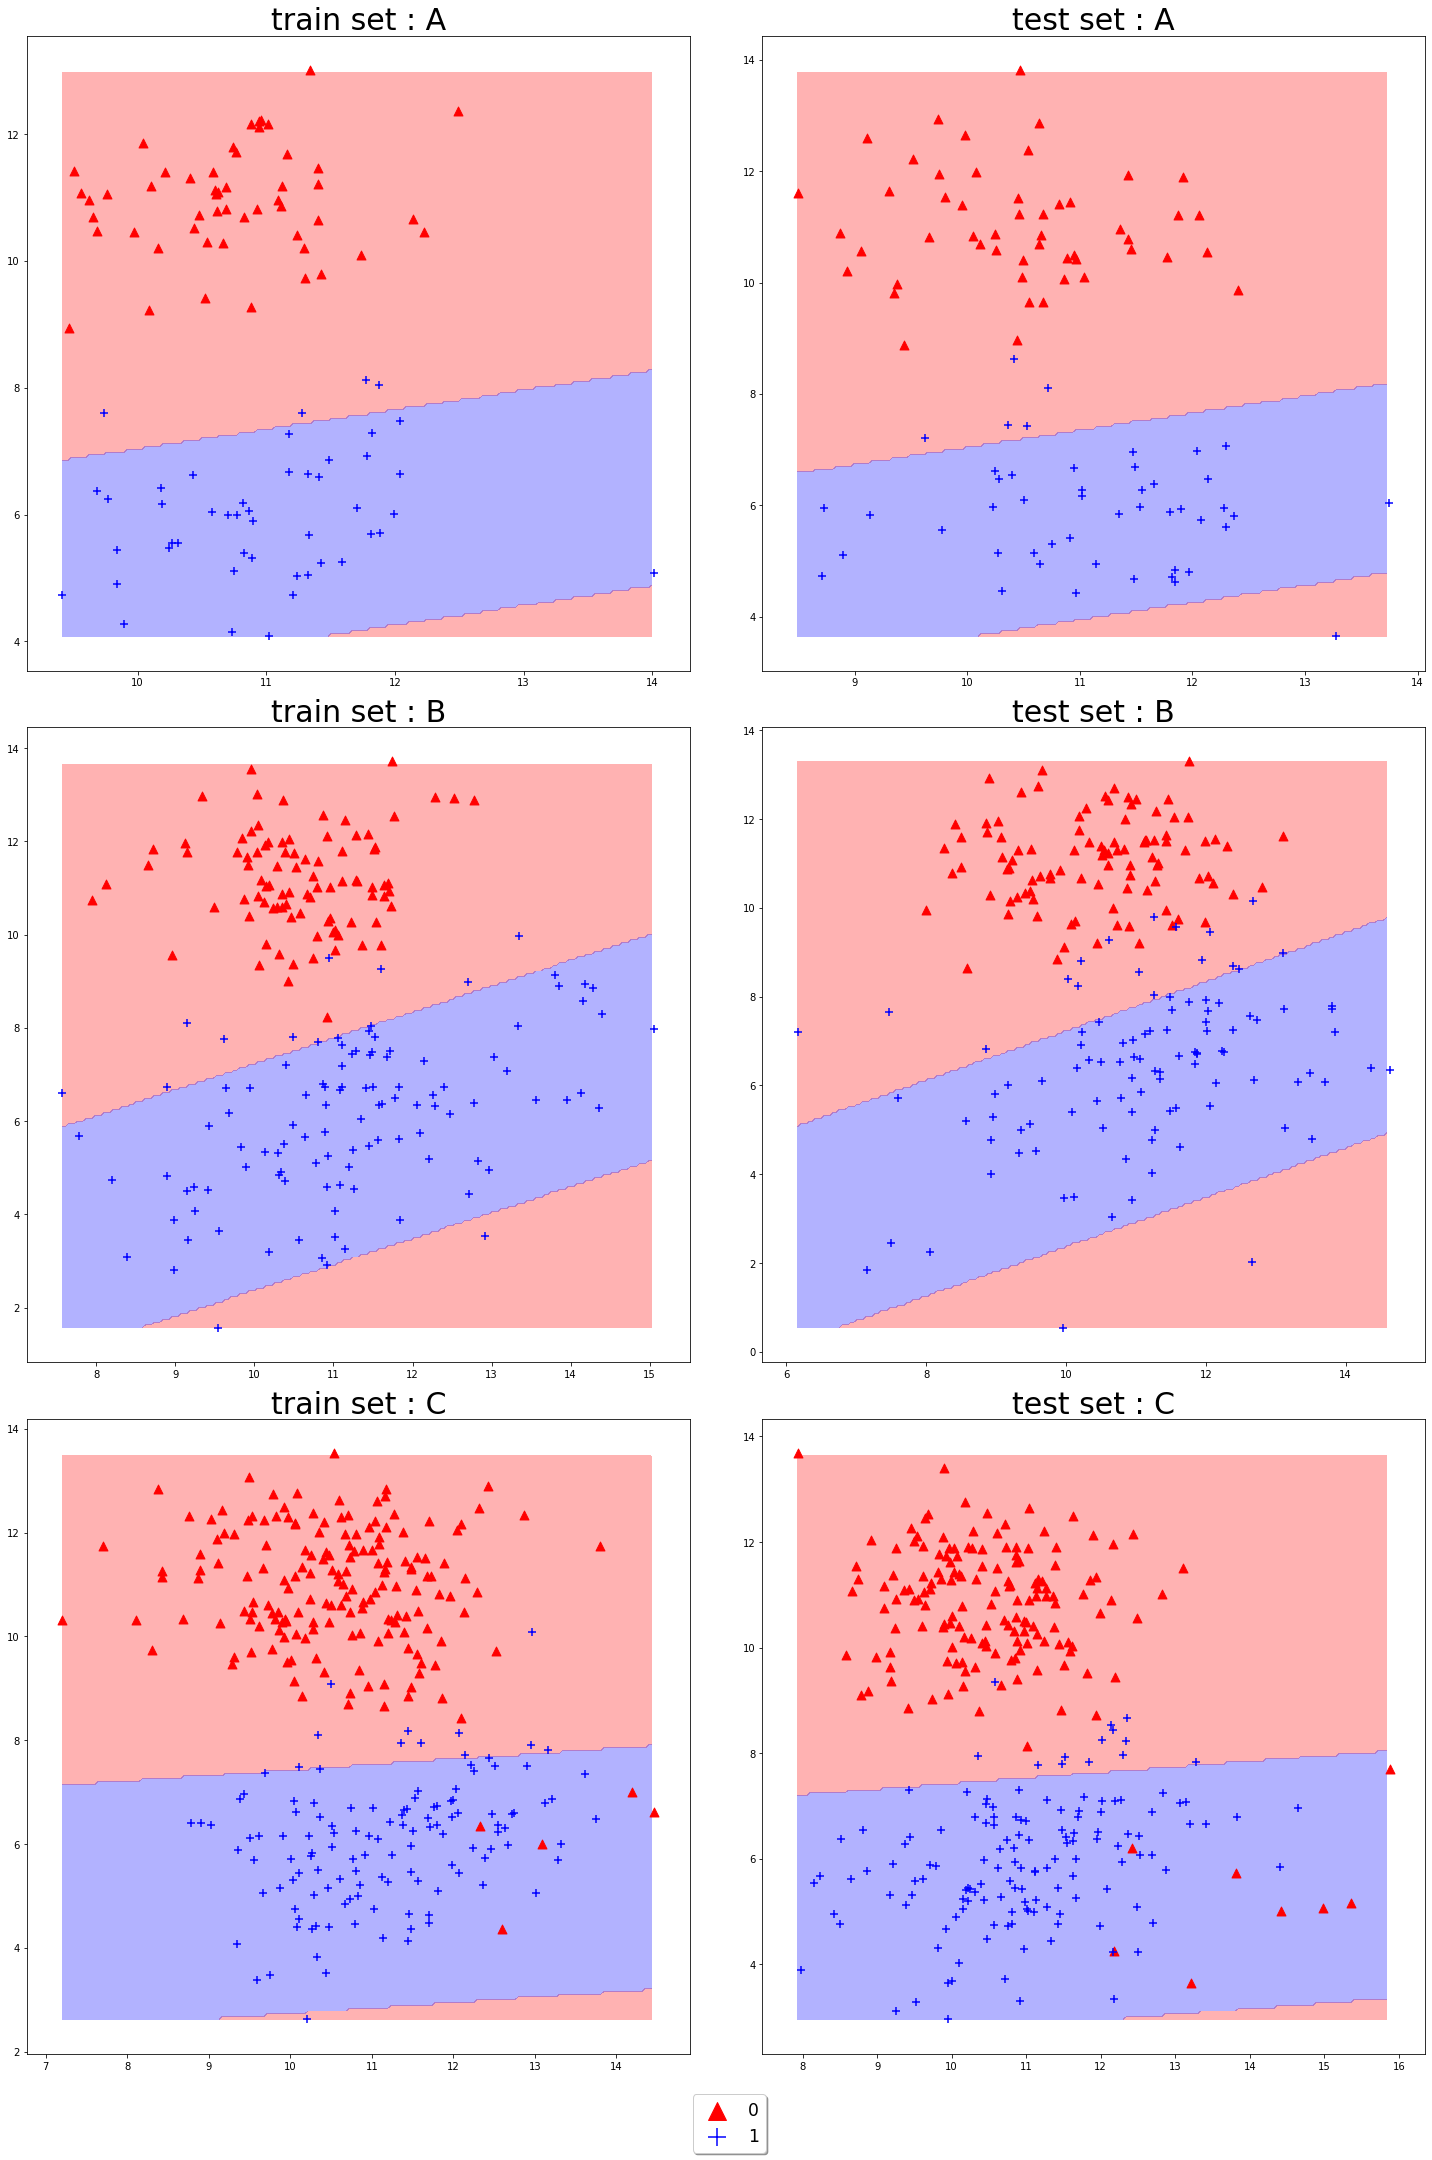

In [107]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    print ("----------------- {} --------------------".format(l))
    classifier = Linear_reg()
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        # Fit the classifier
        if t == "train":
            classifier.fit(x, y)
        grid, x_grid, y_grid = make_grid(data = x, step = 200)
        ax[k][j].contourf(x_grid, y_grid, classifier.predict(grid).reshape(x_grid.shape),
                          colors = ('red', 'blue'), levels = [-1,0,1], alpha = 0.3)
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker = MARKS[i], s = 80, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);
        print ("Error in {} : {}".format(t, 1 - classifier.score(x, y)))
    print ("w : {}".format(classifier.w))
    print ("sigma_squared : {}".format(classifier.sigma_square))

ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                markerscale = 2)
                
f.tight_layout();

#QDA

----------------- A --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Error in train : 0.0
Error in test : 0.010101010101010055
pi : 0.47474747474747475
mu_0 : [[10.73248858 10.93983367]]
mu_1 : [[11.00911982  5.98309461]]
sigma_0 : [[0.46464757 0.0989291 ]
 [0.0989291  0.71324415]]
sigma_1 : [[0.71088655 0.17544597]
 [0.17544597 0.95005365]]
----------------- B --------------------
Error in train : 0.01005025125628145
Error in test : 0.03015075376884424
pi : 0.5477386934673367
mu_0 : [[10.58256756 11.17169818]]
mu_1 : [[11.2357268   6.08554784]]
sigma_0 : [[0.76164392 0.05352417]
 [0.05352417 1.10741986]]
sigma_1 : [[2.37202391 1.2300858 ]
 [1.2300858  2.85608054]]
----------------- C --------------------
Error in train : 0.030100334448160515
Error in test : 0.04013377926421402
pi : 0.4180602006688963
mu_0 : [[10.61324808 10.83448839]]
mu_1 : [[11.18463199  6.04249315]]
sigma_0 : [[ 1.28689318 -0.44045211]
 [-0.44045211  1.83343438]]
sigma_1 : [[1.26768817 0.45714317]
 [0.45714317 1.44158652]]


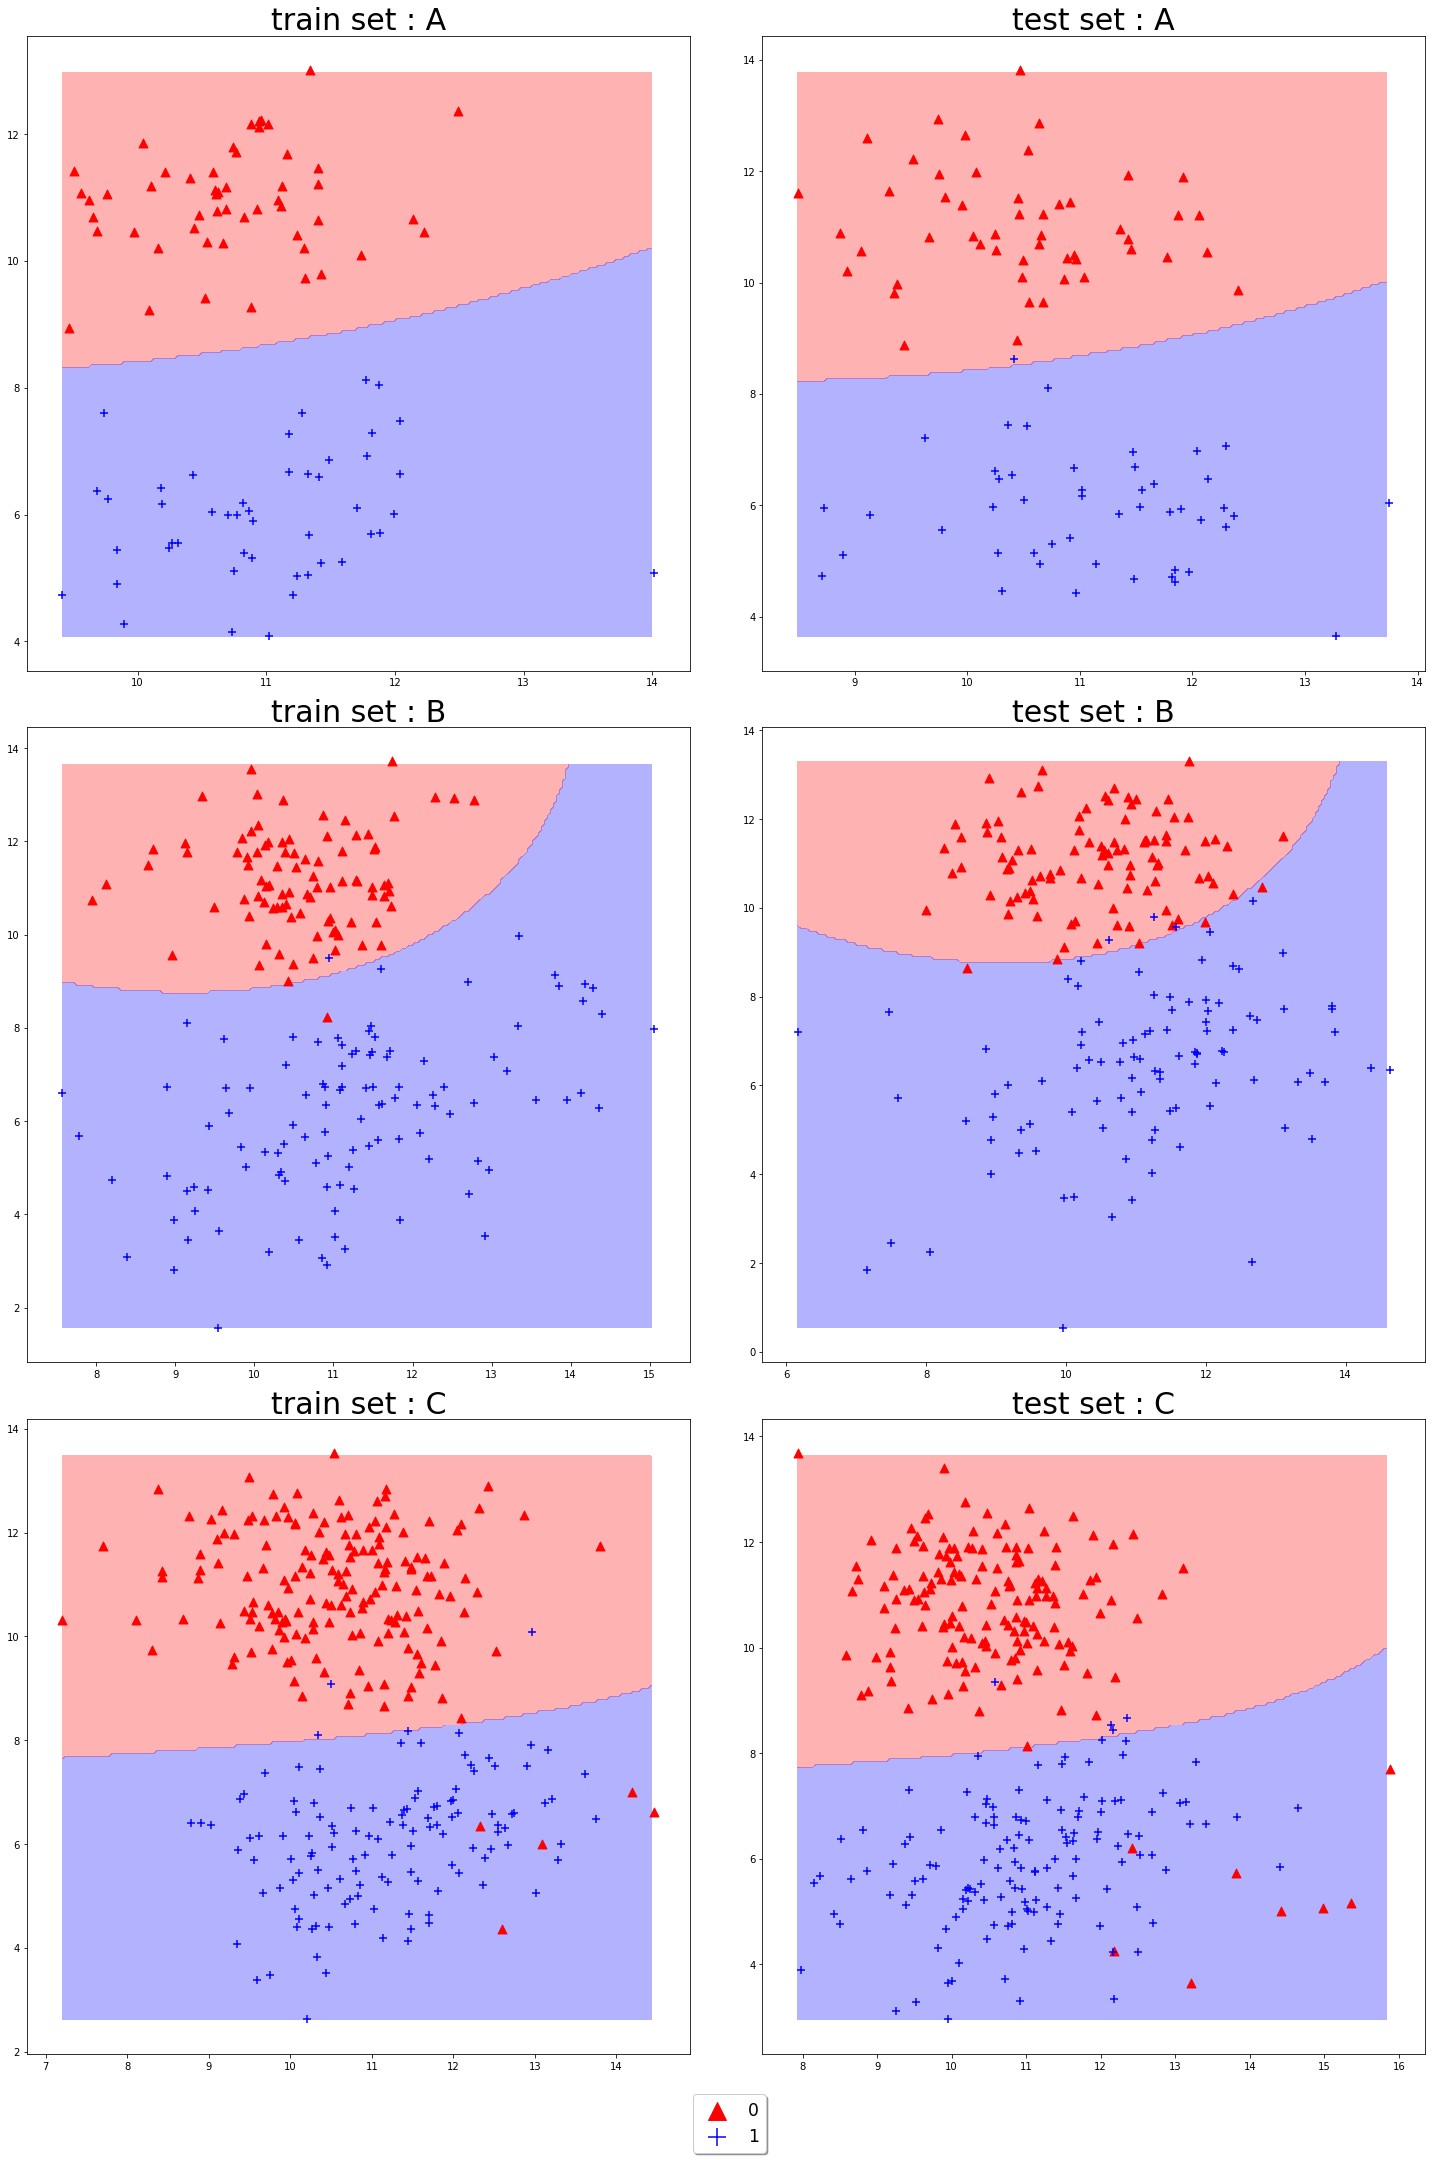

In [108]:
f, ax = plt.subplots(3, 2, figsize = (20, 30))

for k, l in enumerate("ABC"):
    print ("----------------- {} --------------------".format(l))
    classifier = QDA()
    for j, t in enumerate(["train", "test"]):
        x = D[l][t].as_matrix()[:, :2]
        y = D[l][t].as_matrix()[:, 2]
        # Fit the classifier
        if t == "train":
            classifier.fit(x, y)
        grid, x_grid, y_grid = make_grid(data = x, step = 200)
        ax[k][j].contourf(x_grid, y_grid, classifier.predict(grid).reshape(x_grid.shape),
                          colors = ('red', 'blue'), levels = [-1,0,1], alpha = 0.3)
        for i, label in enumerate([0, 1]):
            ax[k][j].scatter(x[y == label, 0], x[y == label, 1],
                             c = COLS[i], marker = MARKS[i], s = 80, label = label)
            ax[k][j].set_title(t + " set : " + l, size = 30);

        print ("Error in {} : {}".format(t, 1 - classifier.score(x, y)))
    print ("pi : {}".format(classifier.pi))
    print ("mu_0 : {}".format(classifier.mu_0))
    print ("mu_1 : {}".format(classifier.mu_1))
    print ("sigma_0 : {}".format(classifier.sigma_0))
    print ("sigma_1 : {}".format(classifier.sigma_1))
ax[k][j].legend(loc='upper center', bbox_to_anchor=(-0.05, -0.05),
                fancybox=True, shadow=True, ncol=1, fontsize = 'xx-large',
                markerscale = 2)
                
f.tight_layout();